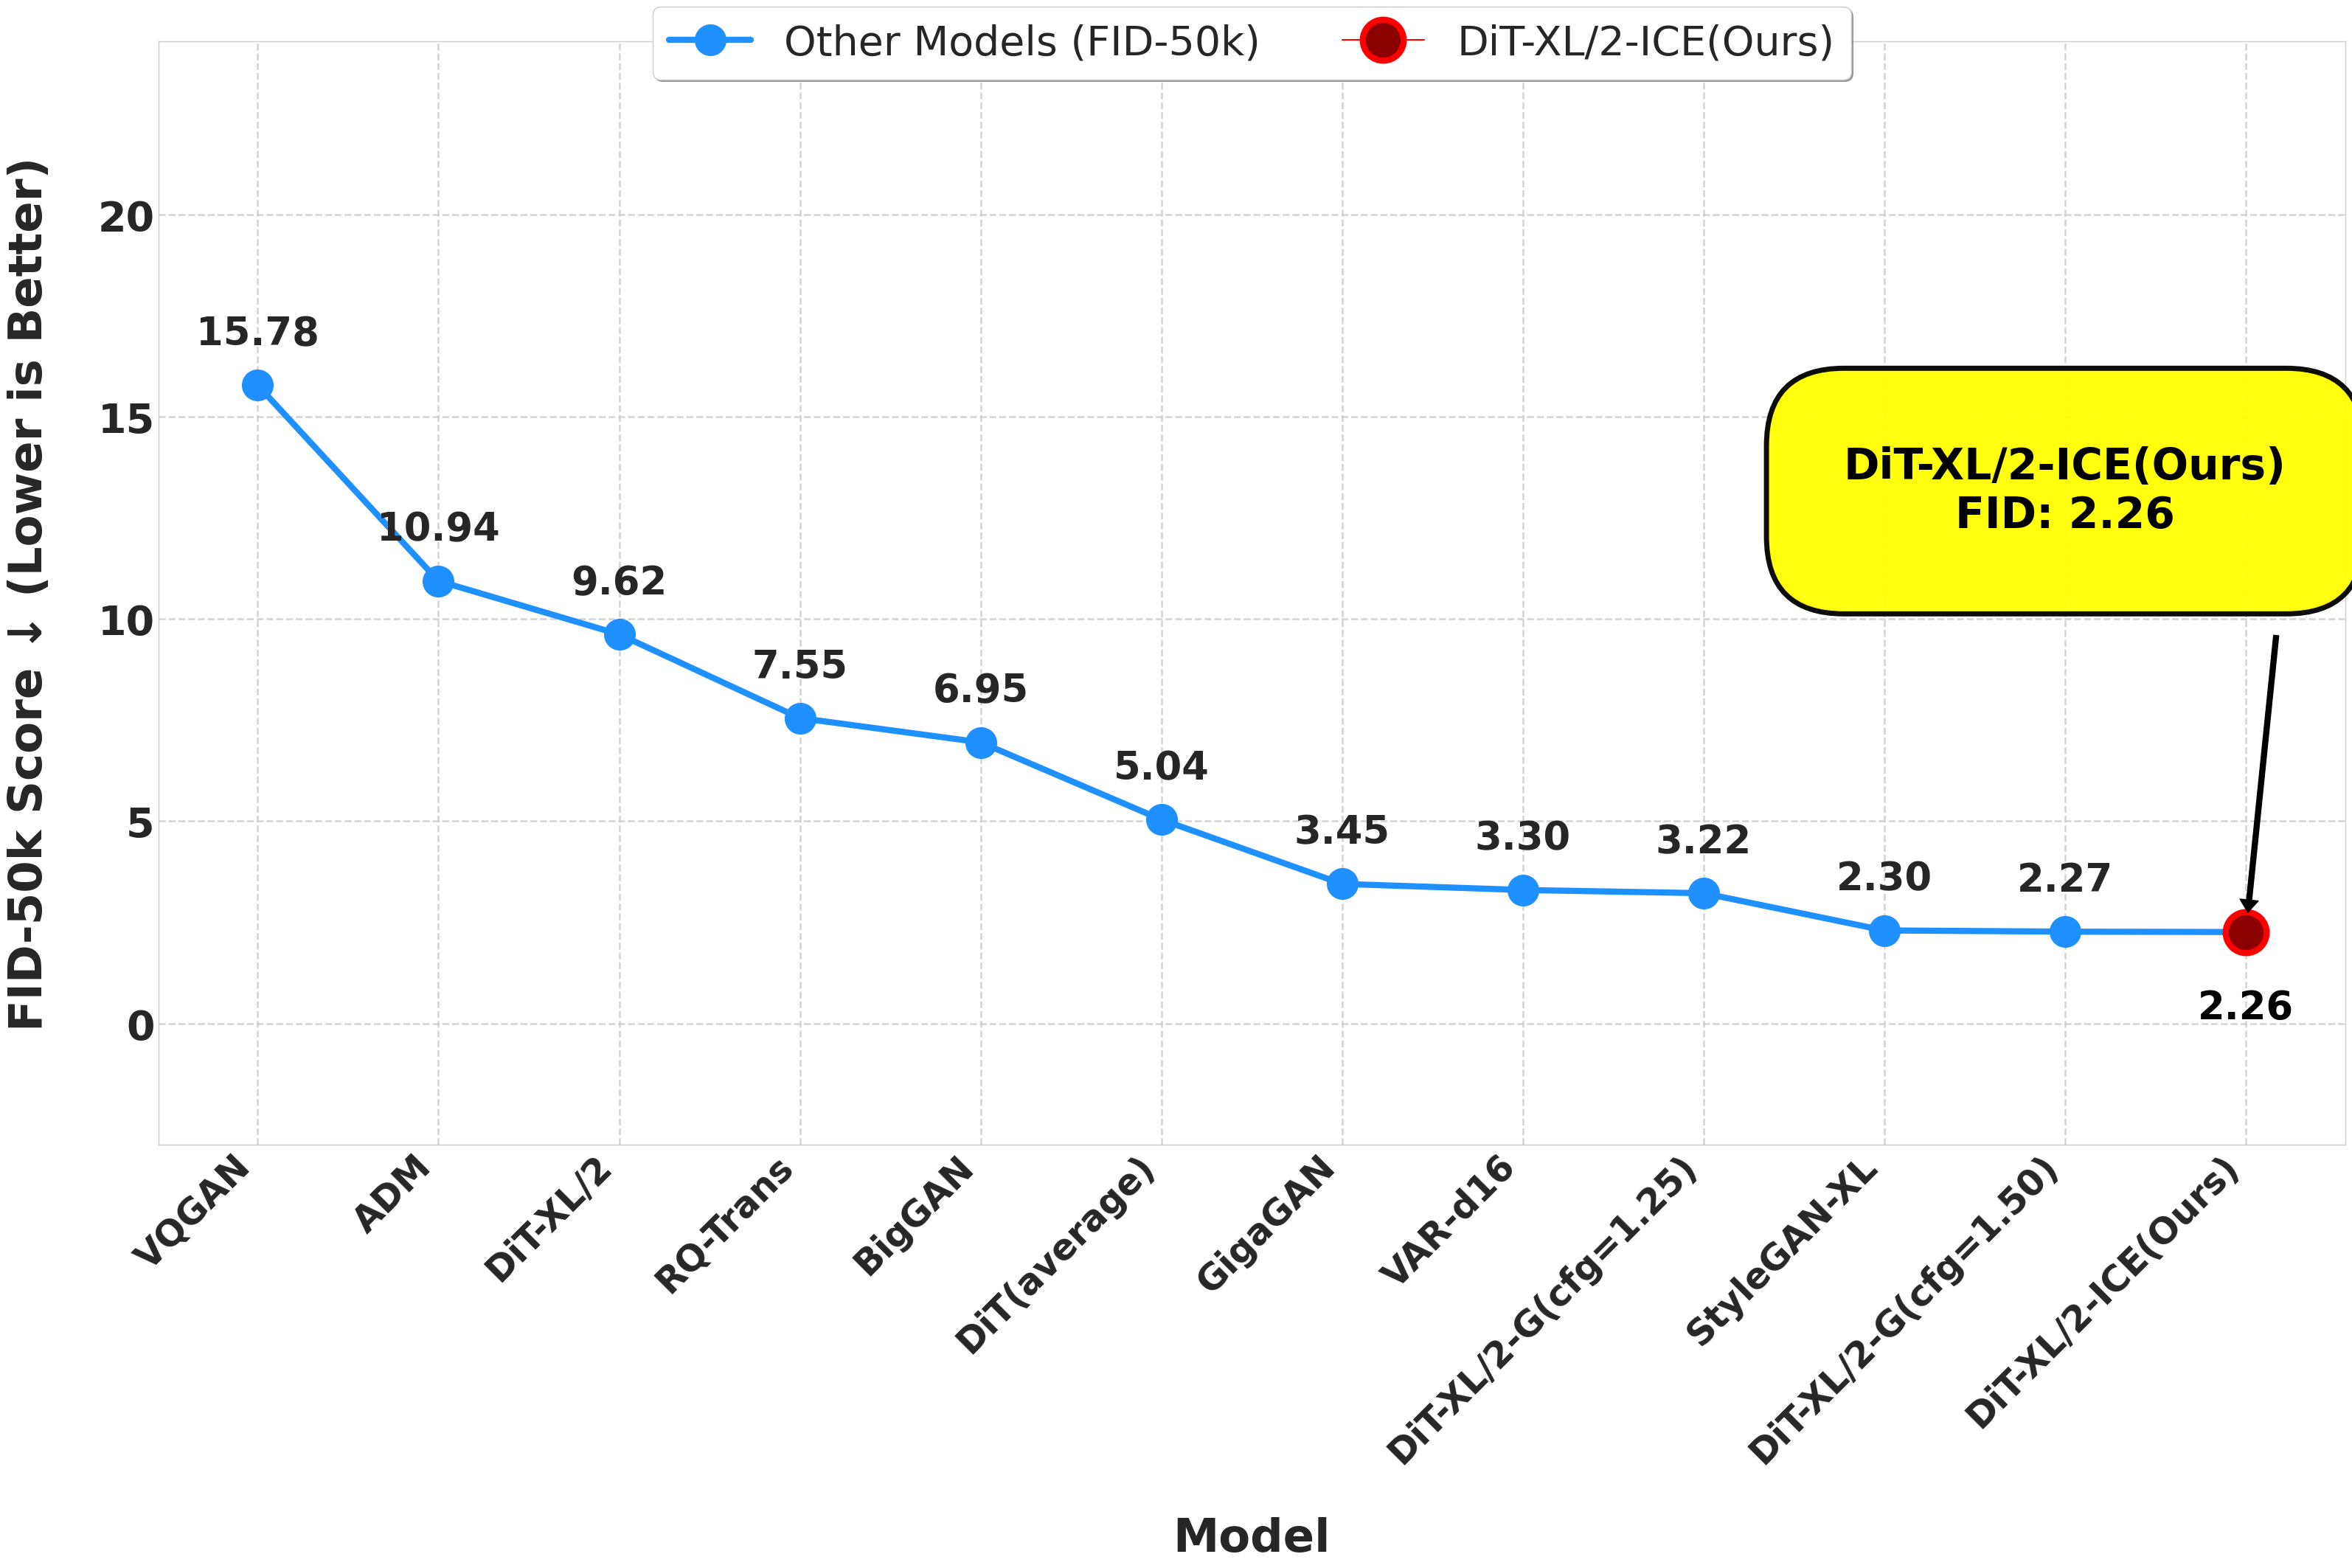

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 从图像中提取的数据
models = [
    'VQGAN', 'ADM', 'DiT-XL/2', 'RQ-Trans', 'BigGAN',
    'DiT(average)', 'GigaGAN', 'VAR-d16', 'DiT-XL/2-G(cfg=1.25)',
    'StyleGAN-XL', 'DiT-XL/2-G(cfg=1.50)', 'DiT-XL/2-ICE(Ours)'
]
fid_scores = [
    15.78, 10.94, 9.62, 7.55, 6.95,
    5.04, 3.45, 3.30, 3.22,
    2.30, 2.27, 2.26
]

# "DiT-XL/2-ICE(Ours)" 的索引
our_model_index = models.index('DiT-XL/2-ICE(Ours)')

# --- 绘图 ---
plt.style.use('seaborn-v0_8-whitegrid') # 使用seaborn样式以获得简洁外观

plt.figure(figsize=(32, 22)) # 再次增大图形尺寸以容纳更大的数字和元素

# 绘制所有模型的主线
plt.plot(models, fid_scores, marker='o', linestyle='-', color='dodgerblue', markersize=30, linewidth=6, label='Other Models (FID-50k)') # 增大标记和线条

#突出显示 "DiT-XL/2-ICE(Ours)"
plt.plot(models[our_model_index], fid_scores[our_model_index],
         marker='o', color='red', markersize=40, markeredgewidth=6, markerfacecolor='darkred', # 增大标记
         label='DiT-XL/2-ICE(Ours)')

# --- 针对科研论文标准的增强 ---

# 移除标题
# plt.title('Comparison of Image Generation Models (FID-50k Score)', fontsize=48, fontweight='bold', pad=50)

# 设置轴标签，使用极大且粗的字体
plt.xlabel('Model', fontsize=45, fontweight='bold', labelpad=45) # 字体保持极大
plt.ylabel('FID-50k Score ↓ (Lower is Better)', fontsize=45, fontweight='bold', labelpad=45) # 字体保持极大

# 旋转X轴标签以获得更好的可读性，并使其极粗极大 (模型名称字体)
plt.xticks(rotation=45, ha='right', fontsize=35, fontweight='bold') # X轴模型名称字体
# Y轴刻度数字
plt.yticks(fontsize=40, fontweight='bold') # 极大增大Y轴刻度数字的字号

# 为每个点添加数据标签(FID数值)以提高清晰度，使其极粗极大
for i, score in enumerate(fid_scores):
    vertical_offset = 0.8
    if i == our_model_index:
        vertical_offset = -1.4 # 调整我们模型数据点标签的垂直偏移
        plt.text(models[i], score + vertical_offset, f'{score:.2f}', ha='center', va='top', fontsize=38, fontweight='bold', color='black') # 极大增大我们模型数据点标签的字号
    else:
        plt.text(models[i], score + vertical_offset, f'{score:.2f}', ha='center', va='bottom', fontsize=38, fontweight='bold') # 极大增大其他数据点标签的字号

# 为 "DiT-XL/2-ICE(Ours)" 添加特定的注释，使其极粗极大，注释框也极大，内部数字也极大
our_model_name = models[our_model_index]
our_model_score = fid_scores[our_model_index]
annotation_text = f'{our_model_name}\nFID: {our_model_score:.2f}' # 注释文本
plt.annotate(
    annotation_text,
    xy=(our_model_name, our_model_score),
    xytext=(models[our_model_index-1], our_model_score + 10.0), # 调整注释位置以获得更多空间
    ha='center',
    fontsize=42, # 极大增大注释框内所有文字（包括数字）的字号
    fontweight='bold',
    color='black',
    arrowprops=dict(facecolor='black', shrink=0.05, width=5, headwidth=18), # 增大箭头
    bbox=dict(boxstyle="round,pad=1.8", fc="yellow", ec="black", lw=5, alpha=0.95) # 增大注释框
)

# 添加图例，使用极大且粗的字体 (图例中的文字)
# 将图例放在图的顶部，但稍微向下调整，因为没有标题了
plt.legend(fontsize=40, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, frameon=True, shadow=True) # 图例文字大小，调整位置

# 调整布局以防止标签重叠
plt.tight_layout(rect=[0, 0, 1, 0.98]) # 调整布局区域，为顶部图例留出空间 (因为标题已移除)

# 添加更突出的网格
plt.grid(True, linestyle='--', linewidth=1.8, alpha=0.85)

# 设置y轴限制以留出一些空间
plt.ylim(-3.0, max(fid_scores) + 8.5) # 调整Y轴范围以容纳所有元素

# --- 显示绘图 ---
plt.show()
